## Isolation Forest 

One efficient way of performing outlier detection in high-dimensional datasets is to use random forests. The ensemble.IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.
Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.
This strategy is illustrated below.
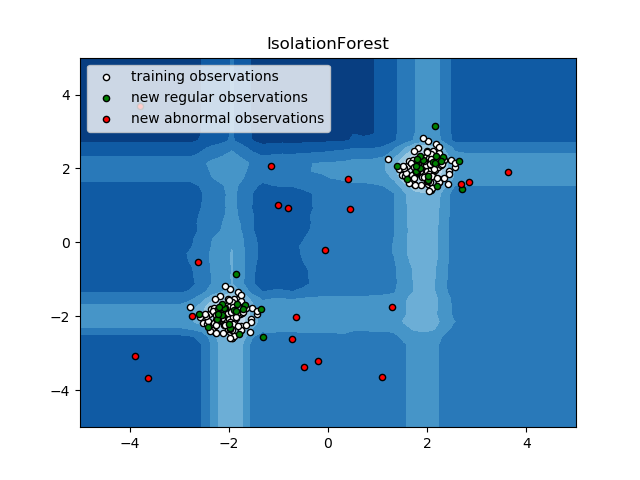

In [36]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [37]:
#Gathering Data
credit = pd.read_csv(r"E:\Github\Python\Risk.txt",sep=",",index_col=False)

In [38]:
#First 5 Rows of Data
credit.head()

,ID,AGE,INCOME,GENDER,MARITAL,NUMKIDS,NUMCARDS,HOWPAID,MORTGAGE,STORECAR,LOANS,RISK
0,100756,44,59944,m,married,1,2,monthly,y,2,0,good risk
1,100668,35,59692,m,married,1,1,monthly,y,1,0,bad loss
2,100418,34,59508,m,married,1,1,monthly,y,2,1,good risk
3,100416,34,59463,m,married,0,2,monthly,y,1,1,bad loss
4,100590,39,59393,f,married,0,2,monthly,y,1,0,good risk


In [39]:
#Selecting Numeric Fields To Be Used In Modelling
X = credit[['AGE','INCOME','NUMKIDS','NUMCARDS','LOANS']]

In [40]:
#Loading Min Max Scaling and Creating New Data Frame
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [41]:
#Assining Column Names
X_normalized.columns = ['AGE','INCOME','NUMKIDS','NUMCARDS','LOANS']

In [42]:
#Implementing Algorithm
from sklearn.ensemble import IsolationForest
iforest = IsolationForest()
iforest.fit(X_normalized)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [43]:
#Predicting Anomaly Class and Anomaly Score
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [44]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class'] = Anomaly_Class
X['Anomaly_Score'] = Anomaly_Score

In [45]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class')[['Anomaly_Score']].count()

,Anomaly_Score
Anomaly_Class,
-1,412
1,3705


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C78657E940>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001C7865C8550>], dtype=object)

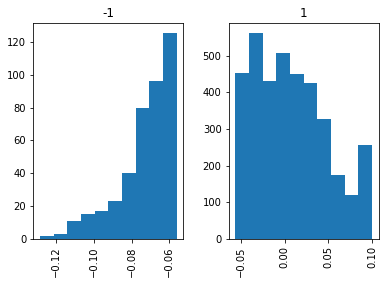

In [46]:
#Histogram of Anomaly Scores By Anomaly Class
X['Anomaly_Score'].hist(by=X['Anomaly_Class'])

In [47]:
#Descriptive Statistics
X['Anomaly_Score'].describe()

count    4117.000000
mean       -0.000395
std         0.046016
min        -0.128609
25%        -0.035589
50%        -0.002287
75%         0.031939
max         0.099670
Name: Anomaly_Score, dtype: float64

In [48]:
#Implementing Algorithm With Different Parameters
#contamination: Proportion of outliers in the data set
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=0.2)
iforest.fit(X_normalized)

IsolationForest(bootstrap=False, contamination=0.2, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [49]:
#Predicting Anomaly Class and Anomaly Score
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [50]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class_Contamination'] = Anomaly_Class
X['Anomaly_Score_Contamination'] = Anomaly_Score

In [51]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class_Contamination')[['Anomaly_Score_Contamination']].count()

,Anomaly_Score_Contamination
Anomaly_Class_Contamination,
-1,824
1,3293


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C78666F9E8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001C7866A9860>], dtype=object)

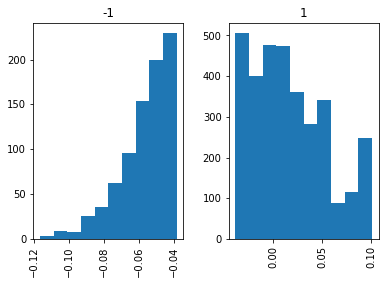

In [52]:
#Histogram of Anomaly Scores By Anomaly Class
X['Anomaly_Score_Contamination'].hist(by=X['Anomaly_Class_Contamination'])

In [53]:
#Descriptive Statistics
X['Anomaly_Score_Contamination'].describe()

count    4117.000000
mean        0.002079
std         0.045171
min        -0.116328
25%        -0.032151
50%        -0.000480
75%         0.033868
max         0.100871
Name: Anomaly_Score_Contamination, dtype: float64

In [54]:
#Implementing Algorithm With Different Parameters
#bootstrap: If True, individual trees are fit on random subsets of the training data sampled with replacement.
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(bootstrap=True)
iforest.fit(X_normalized)

IsolationForest(bootstrap=True, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [55]:
#Predicting Anomaly Class and Anomaly Score
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [56]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class_Bootstrap'] = Anomaly_Class
X['Anomaly_Score_Bootstrap'] = Anomaly_Score

In [57]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class_Bootstrap')[['Anomaly_Score_Bootstrap']].count()

,Anomaly_Score_Bootstrap
Anomaly_Class_Bootstrap,
-1,412
1,3705


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C7876FC0F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001C787762128>], dtype=object)

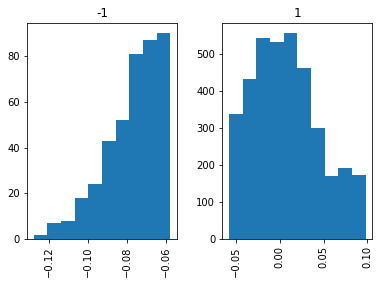

In [58]:
#Histogram of Anomaly Scores By Anomaly Class
X['Anomaly_Score_Bootstrap'].hist(by=X['Anomaly_Class_Bootstrap'])

In [59]:
#Original Data Set With New Variables
X.head()

,AGE,INCOME,NUMKIDS,NUMCARDS,LOANS,Anomaly_Class,Anomaly_Score,Anomaly_Class_Contamination,Anomaly_Score_Contamination,Anomaly_Class_Bootstrap,Anomaly_Score_Bootstrap
0,44,59944,1,2,0,-1,-0.122787,-1,-0.112032,-1,-0.115129
1,35,59692,1,1,0,-1,-0.097547,-1,-0.088355,-1,-0.097733
2,34,59508,1,1,1,-1,-0.072164,-1,-0.050749,-1,-0.082535
3,34,59463,0,2,1,-1,-0.068529,-1,-0.060157,-1,-0.100002
4,39,59393,0,2,0,-1,-0.108331,-1,-0.084893,-1,-0.101573


In [60]:
#Top 5 Anomaly Records
X[['Anomaly_Score_Contamination','Anomaly_Score_Bootstrap','Anomaly_Score']].head().sort_values(['Anomaly_Score_Contamination'], ascending=[1])

,Anomaly_Score_Contamination,Anomaly_Score_Bootstrap,Anomaly_Score
0,-0.112032,-0.115129,-0.122787
1,-0.088355,-0.097733,-0.097547
4,-0.084893,-0.101573,-0.108331
3,-0.060157,-0.100002,-0.068529
2,-0.050749,-0.082535,-0.072164
